In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [ ]:
selected_features = ["HighBP", "Diabetes_binary", "HighChol", "Stroke",
                     "GenHlth", "Age", "DiffWalk", "PhysHlth", "HeartDiseaseorAttack","Smoker","Income"]
df_selected = df[selected_features]
data=df_selected
data.head()


,HighBP,Diabetes_binary,HighChol,Stroke,GenHlth,Age,DiffWalk,PhysHlth,HeartDiseaseorAttack,Smoker,Income
0,1.0,0.0,1.0,0.0,5.0,9.0,1.0,15.0,0.0,1.0,3.0
1,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,5.0,9.0,1.0,30.0,0.0,0.0,8.0
3,1.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,6.0
4,1.0,0.0,1.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (183579, 10)
X_test shape: (45895, 10)
y_train shape: (183579,)
y_test shape: (45895,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("X_esampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X_esampled shape: (411522, 10)
y_resampled shape: (411522,)


In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test_resampled shape:", X_test_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test_resampled shape:", y_test_resampled.shape)

X_train_resampled shape: (329217, 10)
X_test_resampled shape: (82305, 10)
y_train_resampled shape: (329217,)
y_test_resampled shape: (82305,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [10, 20,None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)


grid_search.fit(X_train_resampled, y_train_resampled)


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

test_score = best_rf.score(X_test_resampled, y_test_resampled)
print("Test set score:", test_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score: 0.8679746267227457
Test set score: 0.8714780390012757


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        max_features='sqrt',
        min_samples_split=5,
        random_state=42
    ))
])


pipeline.fit(X_train_resampled, y_train_resampled)

train_score = pipeline.score(X_train_resampled, y_train_resampled)
test_score = pipeline.score(X_test_resampled, y_test_resampled)

print(f"Train score: {train_score:.4f}")
print(f"Test score: {test_score:.4f}")


Train score: 0.8981
Test score: 0.8715


In [ ]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test_resampled)
report = classification_report(y_test_resampled, y_pred)

print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     41129
         1.0       0.87      0.87      0.87     41176

    accuracy                           0.87     82305
   macro avg       0.87      0.87      0.87     82305
weighted avg       0.87      0.87      0.87     82305



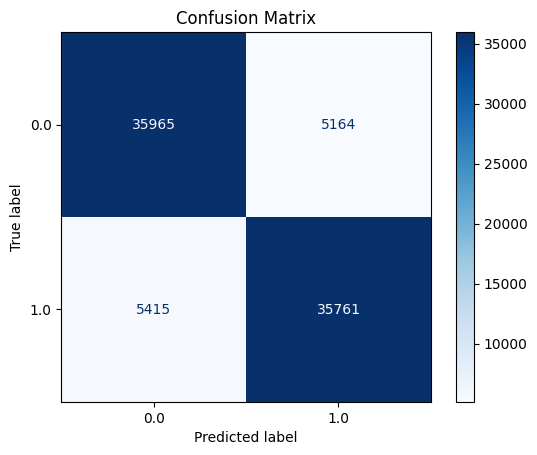

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        colsample_bytree=0.7,
        learning_rate=0.1,
        max_depth=20,
        min_child_weight=1,
        n_estimators=100,
        eval_metric='logloss'
    ))
])


xgb_pipeline.fit(X_train_resampled, y_train_resampled)

train_score = xgb_pipeline.score(X_train_resampled, y_train_resampled)
test_score = xgb_pipeline.score(X_test_resampled, y_test_resampled)


print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")



Train Score: 0.8901
Test Score: 0.8730


In [ ]:
from sklearn.metrics import classification_report
y_pred = xgb_pipeline.predict(X_test_resampled)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     41129
         1.0       0.88      0.87      0.87     41176

    accuracy                           0.87     82305
   macro avg       0.87      0.87      0.87     82305
weighted avg       0.87      0.87      0.87     82305



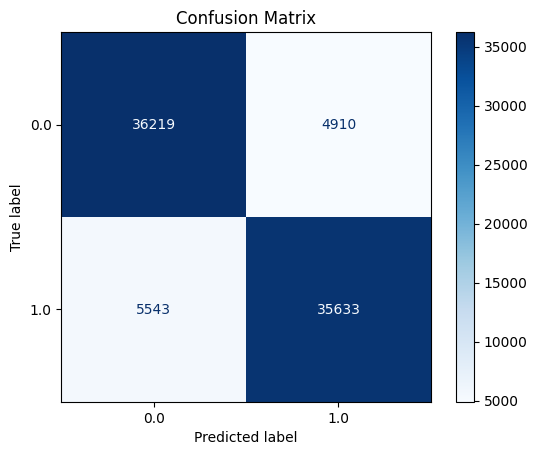

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pickle

with open('xgb_pipeline.pkl', 'wb') as f:
    pickle.dump(xgb_pipeline, f)

files.download('xgb_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('random_forest_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

files.download('random_forest_pipeline.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import mean_squared_error
rf_predictions = pipeline.predict(X_test_resampled)
xgb_predictions = xgb_pipeline.predict(X_test_resampled)
rf_mse = mean_squared_error(y_test_resampled, rf_predictions)
xgb_mse = mean_squared_error(y_test_resampled, xgb_predictions)
print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")


Random Forest MSE: 0.12853411092886216
XGBoost MSE: 0.12700321973148654
